## Importing data

### Importing packages

In [171]:
import glob
import pandas as pd
import matplotlib.pyplot as plt

### Importing dataset 1: DayAheadPrices

In [172]:
data = []

DATA_PATH = '../TECH2-Exam/data/DayAheadPrices_12.1.D'

files = glob.glob(f'{DATA_PATH}/*')

for file in files:
    fn = pd.read_csv(file, sep ='\t', parse_dates=['DateTime'], index_col='DateTime')
    data.append(fn)

df = pd.concat(data).sort_index()
df = df[['ResolutionCode','MapCode','Price']]
df = df.query('MapCode == "NO2" or MapCode == "DE_LU" and ResolutionCode == "PT60M"')
df

,ResolutionCode,MapCode,Price
DateTime,,,
2019-01-01 00:00:00,PT60M,NO2,49.25
2019-01-01 00:00:00,PT60M,DE_LU,10.07
2019-01-01 01:00:00,PT60M,DE_LU,-4.08
2019-01-01 01:00:00,PT60M,NO2,49.17
2019-01-01 02:00:00,PT60M,DE_LU,-9.91
...,...,...,...
2023-12-31 21:00:00,PT60M,NO2,61.77
2023-12-31 22:00:00,PT60M,DE_LU,2.44
2023-12-31 22:00:00,PT60M,NO2,59.31


### Importing dataset 2: PhysicalFlows

In [173]:
data = []

DATA_PATH = '../TECH2-Exam/data/PhysicalFlows_12.1.G'

files = glob.glob(f'{DATA_PATH}/*')

for file in files:
    fn = pd.read_csv(file, sep ='\t', parse_dates=['DateTime'], index_col='DateTime')
    data.append(fn)

df2 = pd.concat(data).sort_index()
df2 = df2.query('(InMapCode == "NO2" and OutMapCode == "DE_LU") or (InMapCode == "DE_LU" and OutMapCode == "NO2")')
df2

,InMapCode,OutMapCode,FlowValue
DateTime,,,
2020-09-01 22:00:00,DE_LU,NO2,0.0000
2020-09-01 22:00:00,NO2,DE_LU,0.0000
2020-09-01 23:00:00,DE_LU,NO2,0.0000
2020-09-01 23:00:00,NO2,DE_LU,0.0000
2020-09-02 00:00:00,DE_LU,NO2,0.0000
...,...,...,...
2023-12-31 21:00:00,DE_LU,NO2,0.0000
2023-12-31 22:00:00,NO2,DE_LU,1350.5975
2023-12-31 22:00:00,DE_LU,NO2,0.0000


## Tasks

### Task 1

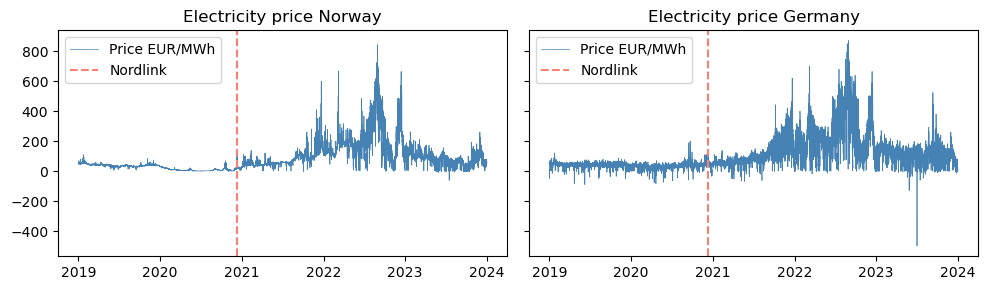

In [174]:
fig, axes = plt.subplots(1,2, sharex=True, sharey=True, figsize=(10,3))                     # Creates subplots with one row and two columns

Country = ['Norway', 'Germany']                                                             # List of the two countries

xvalues = df.index.drop_duplicates()                                                        # Gets the x-values for the plots, removes duplicates
yvalues0 = df[df['MapCode'] == 'NO2']['Price']                                              # Gets the y-values for Norway
yvalues1 = df[df['MapCode'] == 'DE_LU']['Price']                                            # Gets the y-values for Germany

yvalues = [yvalues0, yvalues1]                                                              # Puts the yvalues in a list together

for i in range(2):                                                                          # For loop creating the two subplots
    axes[i].plot(xvalues, yvalues[i], lw=0.5, label='Price EUR/MWh', c='steelblue')                        # Plots the electricity graph
    axes[i].axvline(pd.to_datetime('2020-12-09'), ls='--', c='salmon', label='Nordlink')    # Plots the vertical line for opening of Nordlink
    axes[i].set_title(f'Electricity price {Country[i]}')                                    
    axes[i].legend()            

plt.tight_layout()                                                                          # "Adjust the padding between and around subplots" (matplotlib.org, 2024)

#fig.savefig('figure_task1.png')                                                            # Saves the figure as a png file (matplotlib.org, 2024)

### Task 2

In [175]:
df = df.loc['2019':'2023'].copy()               # Restricting the data for the period 2019-2023
df['Year'] = df.index.year                      # Creating a new index 'Year' containing only years in the restricted period

groups = df.groupby(['MapCode','Year'])         # Create a group, with the new index 'Year' and 'MapCode' (Norway or Germany)

table = groups.agg(                             # Creates a new table that calculate the required statistics
    Mean = ('Price', 'mean'),
    Median = ('Price', 'median'),
    Standard_deviation = ('Price', 'std'),
    Min = ('Price', 'min'),
    Max = ('Price', 'max'),
).round(2)
table                                           # Prints the table

#table.to_excel('table_task2.xlsx')             # Makes a excel sheet with the new data table

Mean  Median  Standard_deviation     Min     Max
MapCode Year                                                    
DE_LU   2019   37.67   38.06               15.52  -90.01  121.46
        2020   30.47   30.99               17.50  -83.94  200.04
        2021   96.85   75.48               73.68  -69.00  620.00
        2022  235.44  208.34              142.82  -19.04  871.00
        2023   95.18   98.02               47.58 -500.00  524.27
NO2     2019   39.26   38.81                8.23    5.86  109.45
        2020    9.29    6.95                8.26   -1.73   99.92
        2021   75.11   59.34               47.22   -1.97  600.16
        2022  211.28  181.13              125.85    0.04  844.00
        2023   79.44   80.46               36.28  -61.84  261.85

### Task 3

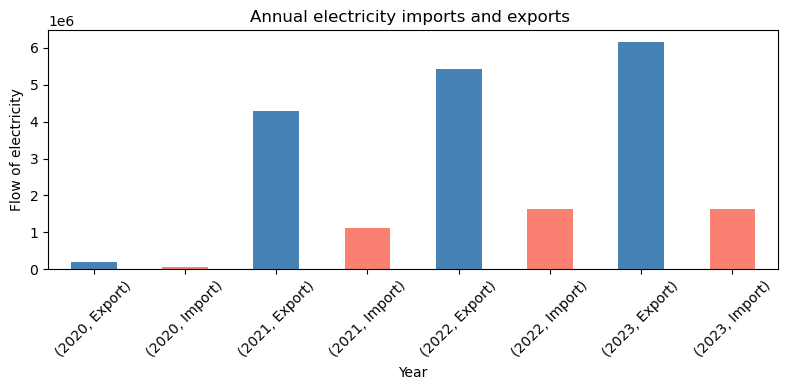

In [176]:
df2['Year'] = df2.index.year                                                                        # Creates a new colum 'year' based on the 'DateTime' index
df2['Indicator'] = df2.apply(lambda x: 'Import' if x['InMapCode'] == 'NO2' else 'Export', axis = 1) # New colum 'Indicator' to tell if its import or export

annual_sum = df2.groupby(['Year','Indicator'])['FlowValue'].sum()                                   # Creates a new group with the new colums and the sum of 'FlowValue'

fig, ax = plt.subplots(figsize=(8,4))                                                               # Creates the plot

annual_sum.plot(kind='bar', color=['steelblue', 'salmon'])                                            # Plots the new annual_sum group.
ax.set_title('Annual electricity imports and exports ')                                             # Adding title
ax.tick_params(axis='x', rotation=45)                                                               # Rotates the x-ticks 45 degrees
ax.set_ylabel('Flow of electricity')                                                                
ax.set_xlabel('Year')


plt.tight_layout()                                                                                  # Adjusting the layout
#fig.savefig('figure_task3.png')                                                                    # Saves the figure as png file

### Task 4

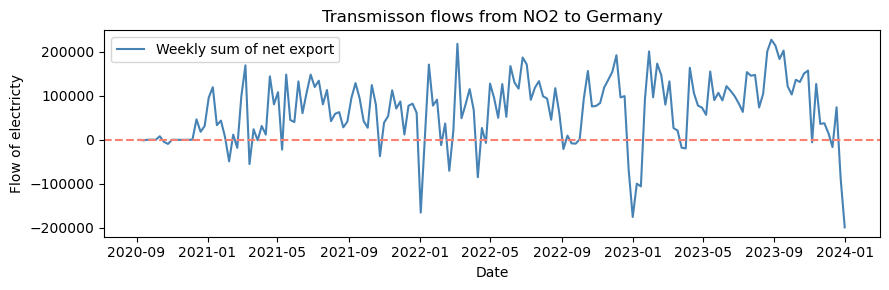

In [177]:
df2['NetExport'] = df2.apply(lambda x: x['FlowValue'] if x['InMapCode'] == 'DE_LU' else -x['FlowValue'], axis=1)

df2_weekly = df2.resample('W')['NetExport'].sum()

fig, ax = plt.subplots(figsize=(9,3))

ax.plot(df2_weekly, label='Weekly sum of net export', c='steelblue')
ax.axhline(y=0, c='salmon', ls='--')
ax.set_title('Transmisson flows from NO2 to Germany')
ax.set_ylabel('Flow of electricty')
ax.set_xlabel('Date')
ax.legend()

plt.tight_layout()

### Task 5

Text(0, 0.5, 'Weekly sum of net export in NO2')

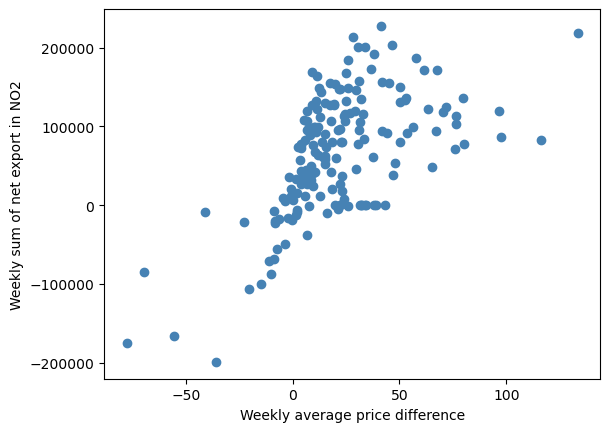

In [191]:
df= df.loc['2020-09-06':]
weekly_prices = df.groupby('MapCode').resample('W')['Price'].mean()
weekly_diff = weekly_prices['DE_LU'] - weekly_prices['NO2']


fig, ax = plt.subplots()

ax.scatter(weekly_diff, df2_weekly, c='steelblue')
ax.set_xlabel('Weekly average price difference')
ax.set_ylabel('Weekly sum of net export in NO2')


### Task 6

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.tight_layout.html Task 1 and 3. 
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html Task 1, 3
